In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [4]:
pop = pd.read_csv('04_03/grades.csv')

In [5]:
pop.head()

,grade
0,3.648651
1,5.959915
2,7.387370
3,4.047515
4,2.846912


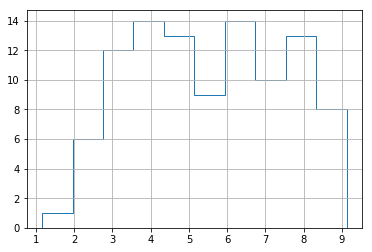

In [6]:
pop.grade.hist(histtype='step')

In [7]:
pop.describe()

,grade
count,100.000000
mean,5.508561
std,1.984988
min,1.160899
25%,3.921372
50%,5.688527
75%,7.272162
max,9.120705


In [9]:
# "Bootstraping Efron 1979" Estimation the uncertainty of our statistic
# , the mean, by generating a large family of samples from the one 
# we have. And then, characterizing the distribution of the mean 
# over this family.

In [12]:
pop.sample(100, replace=True).describe()

,grade
count,100.000000
mean,5.559524
std,2.162019
min,1.160899
25%,3.692472
50%,5.836532
75%,7.785137
max,8.888042


In [15]:
bootstrap = pd.DataFrame({'meangrade': [pop.sample(100, replace=True).grade.mean() for i in range(1000)]})

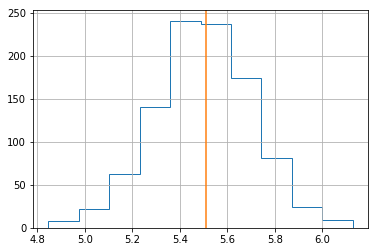

In [17]:
bootstrap.meangrade.hist(histtype='step')
pp.axvline(pop.grade.mean(), color='C1')

In [18]:
bootstrap.meangrade.quantile(0.025), bootstrap.meangrade.quantile(0.975)

(5.074221127647593, 5.907986482161398)

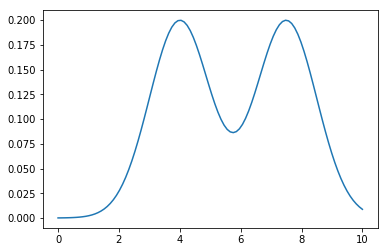

In [20]:
# Use to handle distributions

n1 = scipy.stats.norm(7.5,1)
n2 = scipy.stats.norm(4,1)

x = np.linspace(0,10,100)
pp.plot(x, 0.5*n1.pdf(x) + 0.5*n2.pdf(x))

In [26]:
def draw():
    while True:
        v = n1.rvs() if np.random.rand() < 0.5 else n2.rvs()
        if 0 <= v <= 10:
            return v
# RVS - Random variates of given type.

In [27]:
draw()

4.3061311718507529

In [28]:
def dataset(n=100):
    return pd.DataFrame({'grade': [draw() for i in range(n)]})

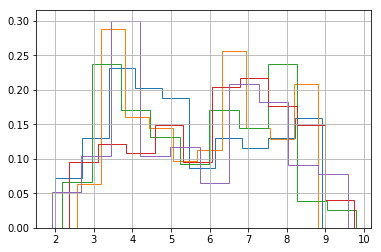

In [29]:
for i in range(5):
    dataset(100).grade.hist(histtype='step', density=True)

In [30]:
means = pd.DataFrame({'meangrade': [dataset(100).grade.mean() for i in range(1000)]})

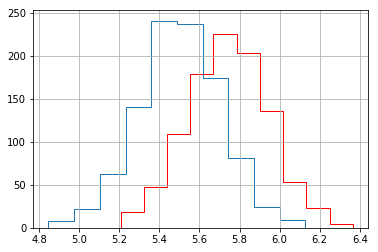

In [34]:
means.meangrade.hist(histtype='step', color='red')
bootstrap.meangrade.hist(histtype='step')

In [ ]:
# We see that the 2 sampling distribution is displaced on the bootstrap 
# estimate, but the spreads are comparable, which justifies our 
# approximated confidence interval